In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

import netCDF4 as nc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import gsw
import cmocean as cm
import arrow
import warnings
warnings.filterwarnings('ignore')

In [3]:
## retrieve days as arrow objects

start ='2017-01-01'
end ='2017-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

In [4]:
#retreive present day DIC and salinity
presday_DIC = np.zeros([365,40,950])
presday_TA = np.zeros([365,40,950])
presday_sal = np.zeros([365,40,950])

for i in range(0,365):

    tdate = arrow_array[i][0]
    #ymd = tdate.format('YYYY')
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    ymd = f'y{yy}m{mm}d{dd}.nc'

#     if i%60 == 0:
#         #print(ymd)
    presday = nc.Dataset(f'/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_{ymd}')
    presday_DIC[i,:,:] = presday['DIC'][0,:,0,:]
    presday_TA[i,:,:] = presday['TA'][0,:,0,:]
    presday_sal[i,:,:] = presday['vosaline'][0,:,0,:]
    presday.close()



In [5]:
oldPI_DIC = np.zeros([365,40,950])
for i in range(0,365):

    tdate = arrow_array[i][0]
    #ymd = tdate.format('YYYY')
    yy = tdate.format('YYYY')
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    ymd = f'y{yy}m{mm}d{dd}.nc'

    #if i%60 == 0:
        #print(ymd) #CAR50_SSP245_v201905_y2017m01d01.nc
    oldPI = nc.Dataset(f'./CAR50/CAR50_SSP245_v201905_{ymd}')
    oldPI_DIC[i,:,:] = oldPI['DIC'][0,:,0,:]      
    oldPI.close()



In [6]:
# #LO_AOUmethod_stoicCO_diseq_allup_y2015m12d29_preind_DIC.nc

# newPI_DIC = np.zeros([365,40,950])
# newPI_sigma0 = np.zeros([365,40,950])
# for i in range(0,365):

#     tdate = arrow_array[i][0]
#     yy = tdate.format('YYYY')
#     mm = tdate.format('MM')
#     dd = tdate.format('DD')
#     ymd = f'y{yy}m{mm}d{dd}'

# #     if i%60 == 0:
#         #print(ymd)
#     newPI = nc.Dataset(f'./preind_DIC/LO_AOUmethod_stoicCO_diseq_allup_{ymd}_preind_DIC.nc')
#    # print(newPI)
#     newPI_DIC[i,:,:] = newPI['preindustrial_DIC']['preind_dic'][:,:] 
#     newPI_sigma0[i,:,:] = newPI['preindustrial_DIC']['sigma0'][:,:] 
#     newPI.close()

In [7]:
# newPI_DIC_sigadj = np.copy(newPI_DIC)
# newPI_DIC_sigadj[newPI_sigma0<=25] = presday_DIC[newPI_sigma0<=25]-50

In [8]:
## averages

#newPI_DIC_monthly = np.zeros([12,40,950])
#newPI_DIC_sigadj_monthly = np.zeros([12,40,950])
oldPI_DIC_monthly = np.zeros([12,40,950])
presday_DIC_monthly = np.zeros([12,40,950])
presday_TA_monthly = np.zeros([12,40,950])
#newPI_sigma0_monthly = np.zeros([12,40,950])


for i in range(0,12):
    
#     newPI_DIC_sigadj_monthly[i,:,:] = \
#         np.nanmean(newPI_DIC_sigadj[(i*30):((i+1)*30),:,:], axis = 0)
#     newPI_DIC_monthly[i,:,:] = \
#         np.nanmean(newPI_DIC[(i*30):((i+1)*30),:,:], axis = 0)
    oldPI_DIC_monthly[i,:,:] = \
        np.nanmean(oldPI_DIC[(i*30):((i+1)*30),:,:], axis = 0)
    presday_DIC_monthly[i,:,:] = \
        np.nanmean(presday_DIC[(i*30):((i+1)*30),:,:], axis = 0)
    presday_TA_monthly[i,:,:] = \
        np.nanmean(presday_TA[(i*30):((i+1)*30),:,:], axis = 0)
#     newPI_sigma0_monthly[i,:,:] = \
#         np.nanmean(newPI_sigma0[(i*30):((i+1)*30),:,:], axis = 0)

In [9]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
print(w['e3t_1d'][:])
wts = w['e3t_1d'][:]
wts[36:40] = 0
print(w['gdept_1d'][:])


[[ 1.00000115  1.00000501  1.00001253  1.00002718  1.0000557   1.00011125
   1.00021946  1.0004302   1.00084067  1.00164012  1.0031971   1.00622914
   1.01213271  1.02362358  1.04597551  1.08940061  1.17356428  1.33592899
   1.64636781  2.22990285  3.29248567  5.11998508  7.97451506 11.8252972
  16.10792044 19.95870258 22.81323256 24.64073198 25.70331479 26.28684983
  26.59728865 26.75965336 26.84381704 26.88724213 26.90959407 26.92108493
  26.9269885  26.93002054 26.93157752 26.93237697]]
[[  0.50000027   1.50000314   2.5000115    3.50003055   4.50007042
    5.50015083   6.50031022   7.50062342   8.50123623   9.50243254
   10.5047653   11.50931127  12.51816684  13.53541212  14.56898216
   15.63428737  16.76117342  18.00713456  19.48178514  21.38997868
   24.10025665  28.22991514  34.68575798  44.51772486  58.48433368
   76.58558445  98.06295924 121.8665184  147.08945807 173.11448217
  199.57304923 226.26030574 253.06663733 279.93454976 306.83419736
  333.75016973 360.6745318  387.6032

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


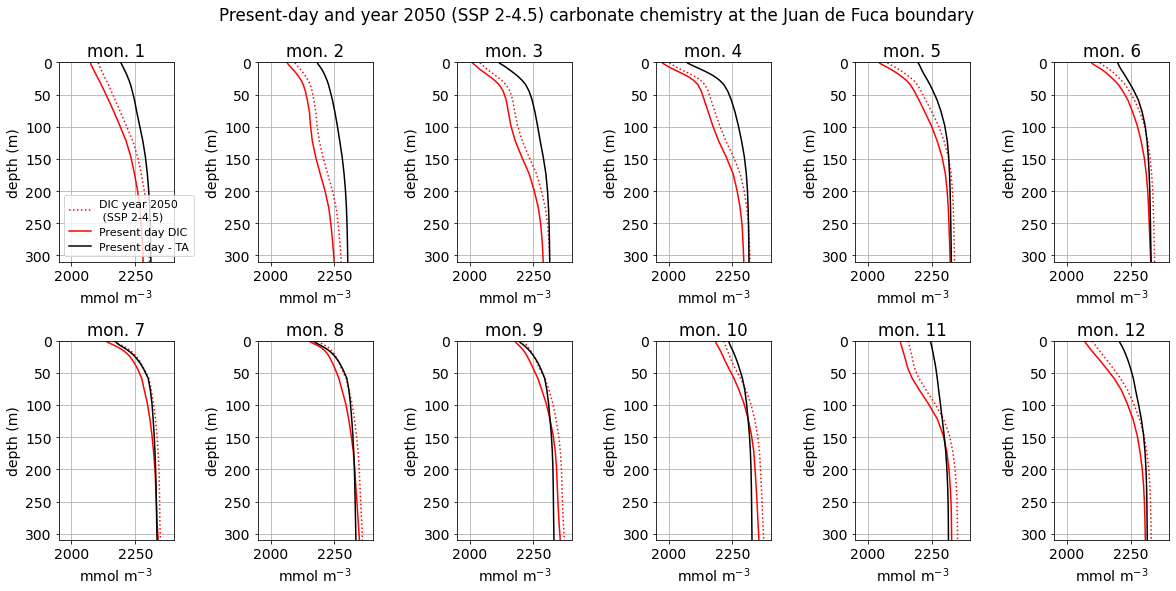

In [10]:
fs = 14
plt.rcParams.update({'font.size': fs})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : fs}

plt.rc('font', **font)


w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

depths = w['gdept_1d'][0,:]

fact = 0.6
fig, axs = plt.subplots(2,6, figsize=(28*fact, 14*fact), facecolor='w', edgecolor='k')
#plt.xticks(rotation=70)

axs = axs.ravel()

for i in range(0,12):

#     axs[i].plot(np.nanmean(newPI_DIC_monthly[i,:,:],axis = 1), \
#                 depths, color = 'k', \
#                 linestyle = '-', label = 'PI DIC(new alg - no sigma0 adj)')
    axs[i].plot(np.nanmean(oldPI_DIC_monthly[i,:,:],axis = 1), \
                depths, color = 'r', \
                linestyle = ':', label = 'DIC year 2050 \n (SSP 2-4.5)')        
#     axs[i].plot(np.nanmean(newPI_DIC_sigadj_monthly[i,:,:],axis = 1), \
#                 depths, color = 'b', \
#                 linestyle = '-', label = 'PI DIC (new alg - with sigma0 adj)')
    axs[i].plot(np.nanmean(presday_DIC_monthly[i,:,:],axis = 1), \
                depths, color = 'r', \
                linestyle = '-', label = 'Present day DIC')
    axs[i].plot(np.nanmean(presday_TA_monthly[i,:,:],axis = 1), \
                depths, color = 'k', \
                linestyle = '-', label = 'Present day - TA')
   # plt.xticks(rotation=70) 
for i in range(0,12):
    axs[i].grid();
    axs[i].set_ylim([0,310])
    axs[i].set_xlim([1950,2400])
    axs[i].invert_yaxis()
    axs[i].set_title(f'mon. {i+1}')
    axs[i].set_ylabel('depth (m)')
    axs[i].set_xlabel('mmol m$^{-3}$')

    
axs[0].legend(loc = 'best', fontsize = 11)    
plt.suptitle('Present-day and year 2050 (SSP 2-4.5) carbonate chemistry at the Juan de Fuca boundary')
plt.tight_layout()

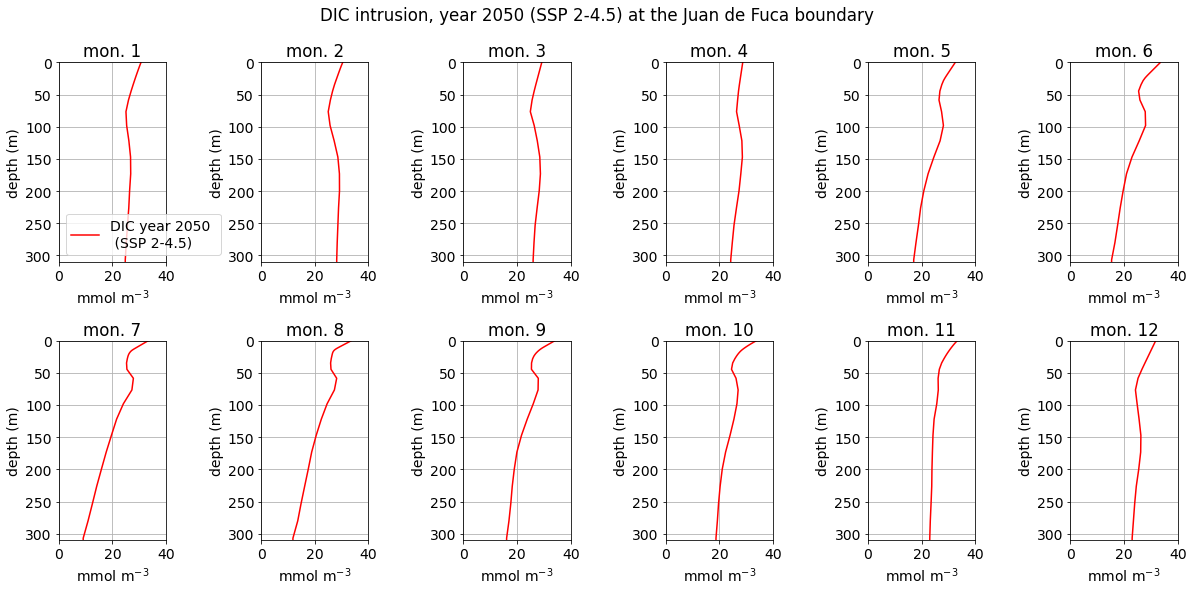

In [11]:
fs = 14
plt.rcParams.update({'font.size': fs})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : fs}

plt.rc('font', **font)


w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

depths = w['gdept_1d'][0,:]

fact = 0.6
fig, axs = plt.subplots(2,6, figsize=(28*fact, 14*fact), facecolor='w', edgecolor='k')
#plt.xticks(rotation=70)
axs = axs.ravel()

for i in range(0,12):

#     axs[i].plot(np.nanmean(newPI_DIC_monthly[i,:,:],axis = 1), \
#                 depths, color = 'k', \
#                 linestyle = '-', label = 'PI DIC(new alg - no sigma0 adj)')
    axs[i].plot(np.nanmean(oldPI_DIC_monthly[i,:,:]-presday_DIC_monthly[i,:,:],axis = 1), \
                depths, color = 'r', \
                linestyle = '-', label = 'DIC year 2050 \n (SSP 2-4.5)')        
#     axs[i].plot(np.nanmean(newPI_DIC_sigadj_monthly[i,:,:],axis = 1), \
#                 depths, color = 'b', \
#                 linestyle = '-', label = 'PI DIC (new alg - with sigma0 adj)')
#     axs[i].plot(np.nanmean(presday_DIC_monthly[i,:,:],axis = 1), \
#                 depths, color = 'r', \
#                 linestyle = '-', label = 'Present day DIC')
#     axs[i].plot(np.nanmean(presday_TA_monthly[i,:,:],axis = 1), \
#                 depths, color = 'k', \
#                 linestyle = '-', label = 'Present day - TA')
   # plt.xticks(rotation=70) 
for i in range(0,12):
    axs[i].grid();
    axs[i].set_ylim([0,310])
    axs[i].set_xlim([0,40])
    axs[i].invert_yaxis()
    axs[i].set_title(f'mon. {i+1}')
    axs[i].set_ylabel('depth (m)')
    axs[i].set_xlabel('mmol m$^{-3}$')

    
axs[0].legend(loc = 'best')    
plt.suptitle('DIC intrusion, year 2050 (SSP 2-4.5) at the Juan de Fuca boundary')
plt.tight_layout()

In [27]:
print(np.max(oldPI_DIC_monthly[:,:,:]-presday_DIC_monthly[:,:,:]))
intr = (oldPI_DIC_monthly[:,:,:]-presday_DIC_monthly[:,:,:])
print(np.mean(intr[:,27,:]))
# print(np.shape(oldPI_DIC_monthly))

34.15052840173212
25.43197315827843


<class 'netCDF4._netCDF4.Variable'>
float32 DIC(time_counter, deptht, yb, xbT)
unlimited dimensions: time_counter
current shape = (12, 40, 10, 30)
filling on, default _FillValue of 9.969209968386869e+36 used



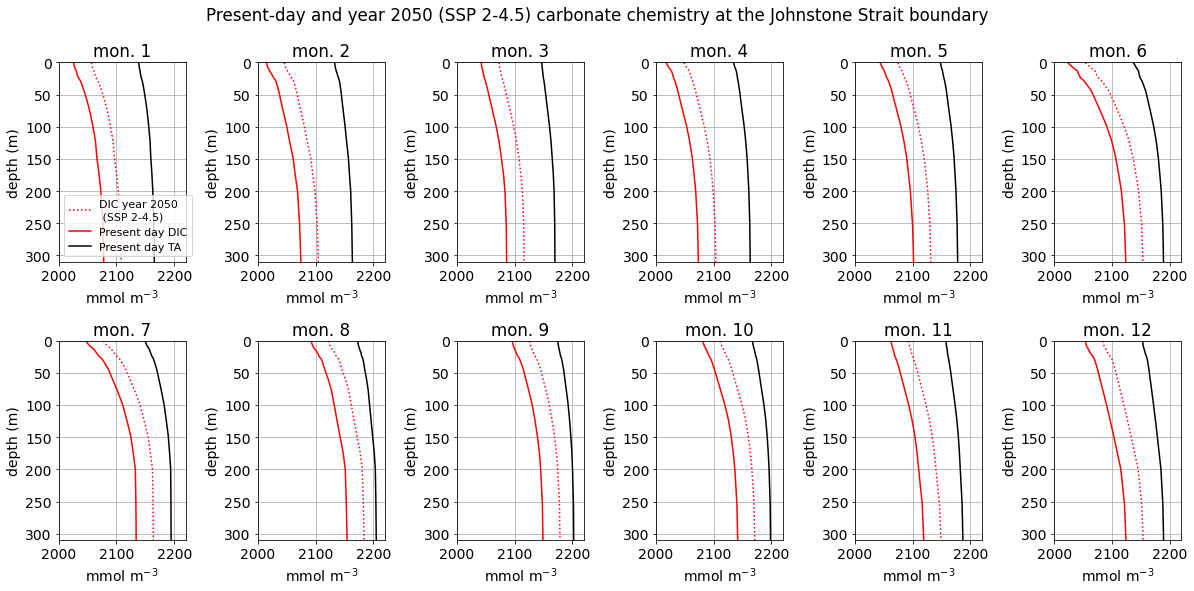

In [13]:
jsintr = nc.Dataset('Dosser_north_TEOS10_CAR50_SSP245_JS.nc')
presday_JS_bc = nc.Dataset('/data/tjarniko/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA.nc')
print(jsintr['DIC'])
mean_int_DIC = np.nanmean(np.nanmean(jsintr['DIC'],axis = 3), axis = 2)
mean_pd_DIC = np.nanmean(np.nanmean(presday_JS_bc['DIC'],axis = 3), axis = 2)
mean_pd_TA = np.nanmean(np.nanmean(presday_JS_bc['TA'],axis = 3), axis = 2)


fact = 0.6
fig, axs = plt.subplots(2,6, figsize=(28*fact, 14*fact), facecolor='w', edgecolor='k')
#plt.xticks(rotation=70)

axs = axs.ravel()

for i in range(0,12):

#     axs[i].plot(np.nanmean(newPI_DIC_monthly[i,:,:],axis = 1), \
#                 depths, color = 'k', \
#                 linestyle = '-', label = 'PI DIC(new alg - no sigma0 adj)')
    axs[i].plot(mean_int_DIC[i,:], \
                depths, color = 'r', \
                linestyle = ':', label = 'DIC year 2050 \n (SSP 2-4.5)')       
    axs[i].plot(mean_pd_DIC[i,:], \
                depths, color = 'r', \
                linestyle = '-', label = 'Present day DIC')      
    axs[i].plot(mean_pd_TA[i,:], \
                depths, color = 'k', \
                linestyle = '-', label = 'Present day TA')  
#     axs[i].plot(np.nanmean(presday_DIC_monthly[i,:,:],axis = 1), \
#                 depths, color = 'r', \
#                 linestyle = '-', label = 'Present day DIC')
#     axs[i].plot(np.nanmean(presday_TA_monthly[i,:,:],axis = 1), \
#                 depths, color = 'k', \
#                 linestyle = '-', label = 'Present day - TA')
for i in range(0,12):
    axs[i].grid();
    axs[i].set_ylim([0,310])
    axs[i].set_xlim([2000,2220])
    axs[i].invert_yaxis()
    axs[i].set_title(f'mon. {i+1}')
    axs[i].set_ylabel('depth (m)')
    axs[i].set_xlabel('mmol m$^{-3}$')

    
axs[0].legend(loc = 'best', fontsize = 11)    
plt.suptitle('Present-day and year 2050 (SSP 2-4.5) carbonate chemistry at the Johnstone Strait boundary')
plt.tight_layout()

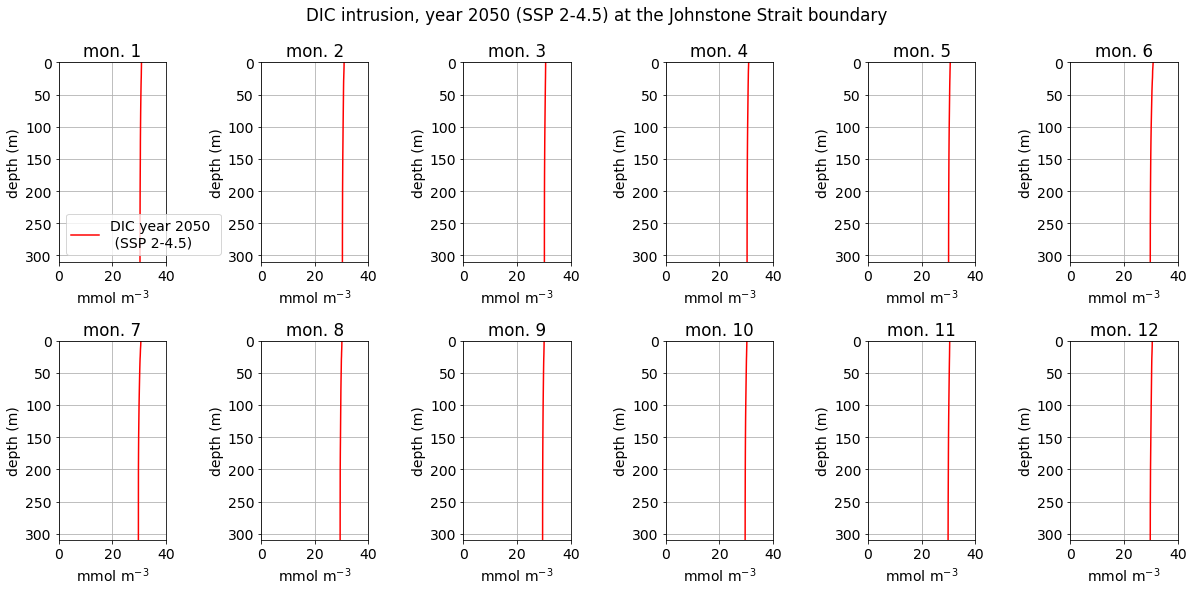

In [14]:
fs = 14
plt.rcParams.update({'font.size': fs})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : fs}

plt.rc('font', **font)


w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

depths = w['gdept_1d'][0,:]

fact = 0.6
fig, axs = plt.subplots(2,6, figsize=(28*fact, 14*fact), facecolor='w', edgecolor='k')
#plt.xticks(rotation=70)
axs = axs.ravel()

for i in range(0,12):

#     axs[i].plot(np.nanmean(newPI_DIC_monthly[i,:,:],axis = 1), \
#                 depths, color = 'k', \
#                 linestyle = '-', label = 'PI DIC(new alg - no sigma0 adj)')
    axs[i].plot(mean_int_DIC[i,:]-mean_pd_DIC[i,:], \
                depths, color = 'r', \
                linestyle = '-', label = 'DIC year 2050 \n (SSP 2-4.5)')        

for i in range(0,12):
    axs[i].grid();
    axs[i].set_ylim([0,310])
    axs[i].set_xlim([0,40])
    axs[i].invert_yaxis()
    axs[i].set_title(f'mon. {i+1}')
    axs[i].set_ylabel('depth (m)')
    axs[i].set_xlabel('mmol m$^{-3}$')

    
axs[0].legend(loc = 'best')    
plt.suptitle('DIC intrusion, year 2050 (SSP 2-4.5) at the Johnstone Strait boundary')
plt.tight_layout()

In [15]:
print(np.max(mean_int_DIC-mean_pd_DIC))
print(np.min(mean_int_DIC-mean_pd_DIC))

30.92273
29.41504


In [16]:
np.min(intrusion)
print('isopycnals not represented (yearround)')
newPI_sigma0

sigmabands = np.arange(20,27,0.1)

max_int_yearround = np.zeros_like(sigmabands)
min_int_yearround = np.zeros_like(sigmabands)
mean_int_yearround = np.zeros_like(sigmabands)

#np.nanm(intrusion[(newPI_sigma0>25) & (newPI_sigma0<25.1)])

for i in range(0,len(sigmabands)):
    if i == 0:
        mask = (newPI_sigma0<=sigmabands[i])
    else:
        mask = (newPI_sigma0>sigmabands[i]) & (newPI_sigma0<sigmabands[i]+.1)
    
    if intrusion[mask].size == 0:
        print(sigmabands[i])
    else:
    
        max_int_yearround[i] = np.nanmax(intrusion[mask])
        min_int_yearround[i] = np.nanmin(intrusion[mask])
        mean_int_yearround[i] = np.nanmean(intrusion[mask])

NameError: name 'intrusion' is not defined

In [ ]:
print('isopycnals not represented (first 60 days)')
intrusion_first60 = intrusion[0:60,:,:]

newPI_sigma0_first60 = newPI_sigma0[0:60,:,:]

sigmabands = np.arange(20,27,0.1)

max_int_first60 = np.zeros_like(sigmabands)
min_int_first60 = np.zeros_like(sigmabands)
mean_int_first60 = np.zeros_like(sigmabands)

#np.nanm(intrusion[(newPI_sigma0>25) & (newPI_sigma0<25.1)])

for i in range(0,len(sigmabands)):
    if i == 0:
        mask = (newPI_sigma0_first60<=sigmabands[i])
    else:
        mask = (newPI_sigma0_first60>sigmabands[i]) & (newPI_sigma0_first60<sigmabands[i]+.1)
    
    if intrusion_first60[mask].size == 0:
        print(sigmabands[i])
    else:
    
        max_int_first60[i] = np.nanmax(intrusion_first60[mask])
        min_int_first60[i] = np.nanmin(intrusion_first60[mask])
        mean_int_first60[i] = np.nanmean(intrusion_first60[mask])

In [ ]:
print('isopycnals not represented (day 150-210')
intrusion_150_210 = intrusion[150:210,:,:]
depths
newPI_sigma0_150_210 = newPI_sigma0[150:210,:,:]

sigmabands = np.arange(20,27,0.1)

max_int_150_210 = np.zeros_like(sigmabands)
min_int_150_210 = np.zeros_like(sigmabands)
mean_int_150_210 = np.zeros_like(sigmabands)

#np.nanm(intrusion[(newPI_sigma0>25) & (newPI_sigma0<25.1)])

for i in range(0,len(sigmabands)):
    if i == 0:
        mask = (newPI_sigma0_150_210<=sigmabands[i])
    else:
        mask = (newPI_sigma0_150_210>sigmabands[i]) & (newPI_sigma0_150_210<sigmabands[i]+.1)
    
    if intrusion_150_210[mask].size == 0:
        print(sigmabands[i])
    else:
    
        max_int_150_210[i] = np.nanmax(intrusion_150_210[mask])
        min_int_150_210[i] = np.nanmin(intrusion_150_210[mask])
        mean_int_150_210[i] = np.nanmean(intrusion_150_210[mask])

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

q = axs[0].plot(mean_int_yearround,sigmabands, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'mean intrusion')
q = axs[0].plot(max_int_yearround,sigmabands, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'r',\
         markersize = 5, label = 'max intrusion')
q = axs[0].plot(min_int_yearround,sigmabands, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'y',\
         markersize = 5, label = 'min intrusion')
axs[0].set_title('intrusion by isopycnal \n year-round')

q = axs[1].plot(mean_int_first60,sigmabands, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'mean intrusion')
q = axs[1].plot(max_int_first60,sigmabands, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'r',\
         markersize = 5, label = 'max intrusion')
q = axs[1].plot(min_int_first60,sigmabands, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'y',\
         markersize = 5, label = 'min intrusion')
axs[1].set_title('intrusion by isopycnal \n DOY 0-60')

q = axs[2].plot(mean_int_150_210,sigmabands, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'k',\
         markersize = 5, label = 'mean intrusion')
q = axs[2].plot(max_int_150_210,sigmabands, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'r',\
         markersize = 5, label = 'max intrusion')
q = axs[2].plot(min_int_150_210,sigmabands, marker = 'o', \
         linestyle = '-', linewidth = 2, color = 'y',\
         markersize = 5, label = 'min intrusion')
axs[2].set_title('intrusion by isopycnal \n DOY 150-210')
for i in range(0,3):
    axs[i].grid();
    axs[i].set_ylim([20,27])
    axs[i].invert_yaxis()
    axs[i].set_xlim([0,70])
    axs[i].set_xlabel('umol/L DIC')
    
axs[2].legend(loc = 'best')

In [ ]:
print('isopycnals where intrusion >67 umol/L')
newPI_sigma0[np.where(intrusion > 67)]